In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [13]:
def compute_y_from_x(X: np.ndarray):
    return np.cos(X * 10)

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Adjust the input and hidden layer sizes as needed
        self.fc2 = nn.Linear(hidden_size, 1)  # Adjust the hidden and output layer sizes as needed

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
num_data = 200
hidden_size_list = np.arange(1, 5001, 50)
learning_rate = 0.001
num_epochs = 3000
test_frac = 0.2
num_repeats = 200  # Number of repeats for each hidden size

low, high = -1.0, 1.0

hidden_size_losses = []
param_num_losses = []

for hidden_size in tqdm(hidden_size_list):
    train_losses = []
    test_losses = []
    for repeat_idx in range(num_repeats):
        # Generate input data
        x = np.linspace(low, high, num_data)  # Replace with your desired range and number of points
        #print(repeat_idx)
        # Generate target data
        y = compute_y_from_x(x)

        # Split the data into train and test sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_frac)

        # Convert data to PyTorch tensors
        x_train_tensor = torch.from_numpy(x_train).float().unsqueeze(1)
        y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
        x_test_tensor = torch.from_numpy(x_test).float().unsqueeze(1)
        y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(1)

        # Create data loaders
        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Instantiate the network
        model = NeuralNetwork(hidden_size)
        pytorch_total_params = sum(p.numel() for p in model.parameters())

        # Define the loss function
        criterion = nn.MSELoss()

        # Define the optimizer
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        num_epochs = 100  # Adjust the number of epochs as needed

        for epoch in range(num_epochs):
            model.train()  # Set the model in training mode
            train_loss = 0.0

            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_loss += loss.item() * inputs.size(0)

            train_loss /= len(train_loader.dataset)

            # Evaluate the model on the test set
            model.eval()  # Set the model in evaluation mode
            test_loss = 0.0

            with torch.no_grad():
                for inputs, targets in test_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    test_loss += loss.item() * inputs.size(0)

            test_loss /= len(test_loader.dataset)

        final_train_loss = train_loss
        final_test_loss = test_loss
        #train_losses.append(final_train_loss)
        #test_losses.append(final_test_loss)

        if repeat_idx == num_repeats - 1:
            print(f"Hidden Size: {hidden_size}, Final Train Loss: {final_train_loss:.4f}, Final Test Loss: {final_test_loss:.4f}")

        hidden_size_losses.append({
            'hidden_size': hidden_size,
            'train_losses': final_train_loss,
            'test_losses': final_test_loss
        })

        param_num_losses.append({
            'param_num': pytorch_total_params,
            'train_losses': final_train_loss,
            'test_losses': final_test_loss
        })


  1%|          | 1/100 [03:31<5:48:34, 211.26s/it]

Hidden Size: 1, Final Train Loss: 0.5139, Final Test Loss: 0.5467


  2%|▏         | 2/100 [07:01<5:44:31, 210.93s/it]

Hidden Size: 3, Final Train Loss: 0.4833, Final Test Loss: 0.5997


  3%|▎         | 3/100 [10:33<5:41:43, 211.38s/it]

Hidden Size: 5, Final Train Loss: 0.5458, Final Test Loss: 0.4792


  4%|▍         | 4/100 [14:14<5:44:03, 215.03s/it]

Hidden Size: 7, Final Train Loss: 0.4761, Final Test Loss: 0.5431


  5%|▌         | 5/100 [17:44<5:37:34, 213.21s/it]

Hidden Size: 9, Final Train Loss: 0.4683, Final Test Loss: 0.5849


  6%|▌         | 6/100 [21:11<5:30:57, 211.25s/it]

Hidden Size: 11, Final Train Loss: 0.4661, Final Test Loss: 0.5235


  7%|▋         | 7/100 [24:38<5:25:11, 209.80s/it]

Hidden Size: 13, Final Train Loss: 0.4830, Final Test Loss: 0.5516


  8%|▊         | 8/100 [28:06<5:20:33, 209.06s/it]

Hidden Size: 15, Final Train Loss: 0.4810, Final Test Loss: 0.5627


  9%|▉         | 9/100 [31:26<5:13:07, 206.45s/it]

Hidden Size: 17, Final Train Loss: 0.4890, Final Test Loss: 0.5286


 10%|█         | 10/100 [34:49<5:08:01, 205.35s/it]

Hidden Size: 19, Final Train Loss: 0.4849, Final Test Loss: 0.5127


 11%|█         | 11/100 [38:13<5:03:40, 204.72s/it]

Hidden Size: 21, Final Train Loss: 0.4421, Final Test Loss: 0.5870


 12%|█▏        | 12/100 [41:37<4:59:57, 204.52s/it]

Hidden Size: 23, Final Train Loss: 0.4794, Final Test Loss: 0.4533


 13%|█▎        | 13/100 [45:01<4:56:36, 204.55s/it]

Hidden Size: 25, Final Train Loss: 0.4858, Final Test Loss: 0.4147


 14%|█▍        | 14/100 [48:29<4:54:36, 205.54s/it]

Hidden Size: 27, Final Train Loss: 0.4571, Final Test Loss: 0.4222


 15%|█▌        | 15/100 [51:52<4:50:12, 204.86s/it]

Hidden Size: 29, Final Train Loss: 0.4710, Final Test Loss: 0.4489


 16%|█▌        | 16/100 [55:18<4:47:15, 205.18s/it]

Hidden Size: 31, Final Train Loss: 0.4723, Final Test Loss: 0.4896


 17%|█▋        | 17/100 [58:43<4:43:46, 205.13s/it]

Hidden Size: 33, Final Train Loss: 0.4544, Final Test Loss: 0.4634


 18%|█▊        | 18/100 [1:02:08<4:40:16, 205.08s/it]

Hidden Size: 35, Final Train Loss: 0.4527, Final Test Loss: 0.4631


 19%|█▉        | 19/100 [1:05:44<4:41:04, 208.20s/it]

Hidden Size: 37, Final Train Loss: 0.5045, Final Test Loss: 0.5074


 20%|██        | 20/100 [1:09:12<4:37:38, 208.23s/it]

Hidden Size: 39, Final Train Loss: 0.4758, Final Test Loss: 0.4695


 21%|██        | 21/100 [1:12:34<4:31:47, 206.42s/it]

Hidden Size: 41, Final Train Loss: 0.4591, Final Test Loss: 0.5135


 22%|██▏       | 22/100 [1:15:56<4:26:38, 205.11s/it]

Hidden Size: 43, Final Train Loss: 0.4799, Final Test Loss: 0.4163


 23%|██▎       | 23/100 [1:19:21<4:23:05, 205.00s/it]

Hidden Size: 45, Final Train Loss: 0.4672, Final Test Loss: 0.4555


 24%|██▍       | 24/100 [1:22:45<4:19:05, 204.54s/it]

Hidden Size: 47, Final Train Loss: 0.4658, Final Test Loss: 0.3902


 25%|██▌       | 25/100 [1:26:07<4:15:04, 204.06s/it]

Hidden Size: 49, Final Train Loss: 0.4567, Final Test Loss: 0.4068


 26%|██▌       | 26/100 [1:29:33<4:12:12, 204.49s/it]

Hidden Size: 51, Final Train Loss: 0.4453, Final Test Loss: 0.4295


 27%|██▋       | 27/100 [1:32:56<4:08:21, 204.14s/it]

Hidden Size: 53, Final Train Loss: 0.4350, Final Test Loss: 0.5308


 28%|██▊       | 28/100 [1:36:18<4:04:13, 203.51s/it]

Hidden Size: 55, Final Train Loss: 0.4328, Final Test Loss: 0.4470


 29%|██▉       | 29/100 [1:39:43<4:01:15, 203.88s/it]

Hidden Size: 57, Final Train Loss: 0.4560, Final Test Loss: 0.4013


 30%|███       | 30/100 [1:43:08<3:58:11, 204.16s/it]

Hidden Size: 59, Final Train Loss: 0.4898, Final Test Loss: 0.3306


 31%|███       | 31/100 [1:46:33<3:55:00, 204.36s/it]

Hidden Size: 61, Final Train Loss: 0.4210, Final Test Loss: 0.4333


 32%|███▏      | 32/100 [1:50:02<3:53:09, 205.73s/it]

Hidden Size: 63, Final Train Loss: 0.4601, Final Test Loss: 0.5052


 33%|███▎      | 33/100 [1:53:27<3:49:43, 205.73s/it]

Hidden Size: 65, Final Train Loss: 0.4694, Final Test Loss: 0.3781


 34%|███▍      | 34/100 [1:56:50<3:45:17, 204.80s/it]

Hidden Size: 67, Final Train Loss: 0.4110, Final Test Loss: 0.5215


 35%|███▌      | 35/100 [2:00:13<3:41:20, 204.31s/it]

Hidden Size: 69, Final Train Loss: 0.4311, Final Test Loss: 0.5171


 36%|███▌      | 36/100 [2:03:36<3:37:29, 203.90s/it]

Hidden Size: 71, Final Train Loss: 0.4560, Final Test Loss: 0.4996


 37%|███▋      | 37/100 [2:06:59<3:33:52, 203.69s/it]

Hidden Size: 73, Final Train Loss: 0.4364, Final Test Loss: 0.5125


 38%|███▊      | 38/100 [2:10:25<3:31:08, 204.33s/it]

Hidden Size: 75, Final Train Loss: 0.4147, Final Test Loss: 0.4119


 39%|███▉      | 39/100 [2:13:48<3:27:10, 203.78s/it]

Hidden Size: 77, Final Train Loss: 0.4053, Final Test Loss: 0.4964


 40%|████      | 40/100 [2:17:12<3:23:48, 203.81s/it]

Hidden Size: 79, Final Train Loss: 0.4454, Final Test Loss: 0.4923


 41%|████      | 41/100 [2:20:39<3:21:29, 204.91s/it]

Hidden Size: 81, Final Train Loss: 0.4453, Final Test Loss: 0.5403


 42%|████▏     | 42/100 [2:24:03<3:17:54, 204.74s/it]

Hidden Size: 83, Final Train Loss: 0.4374, Final Test Loss: 0.4484


 43%|████▎     | 43/100 [2:27:27<3:14:11, 204.42s/it]

Hidden Size: 85, Final Train Loss: 0.4070, Final Test Loss: 0.4473


 44%|████▍     | 44/100 [2:30:51<3:10:36, 204.23s/it]

Hidden Size: 87, Final Train Loss: 0.3805, Final Test Loss: 0.4224


 45%|████▌     | 45/100 [2:34:17<3:07:46, 204.85s/it]

Hidden Size: 89, Final Train Loss: 0.4241, Final Test Loss: 0.4008


 46%|████▌     | 46/100 [2:37:42<3:04:20, 204.82s/it]

Hidden Size: 91, Final Train Loss: 0.4169, Final Test Loss: 0.4791


 47%|████▋     | 47/100 [2:41:06<3:00:43, 204.59s/it]

Hidden Size: 93, Final Train Loss: 0.4455, Final Test Loss: 0.3596


 48%|████▊     | 48/100 [2:44:30<2:57:03, 204.31s/it]

Hidden Size: 95, Final Train Loss: 0.3914, Final Test Loss: 0.4487


 49%|████▉     | 49/100 [2:47:53<2:53:25, 204.02s/it]

Hidden Size: 97, Final Train Loss: 0.4248, Final Test Loss: 0.4453


 50%|█████     | 50/100 [2:51:17<2:50:07, 204.15s/it]

Hidden Size: 99, Final Train Loss: 0.4263, Final Test Loss: 0.4382


 51%|█████     | 51/100 [2:54:42<2:46:57, 204.45s/it]

Hidden Size: 101, Final Train Loss: 0.4379, Final Test Loss: 0.4470


 52%|█████▏    | 52/100 [2:58:08<2:43:48, 204.76s/it]

Hidden Size: 103, Final Train Loss: 0.4104, Final Test Loss: 0.3677


 53%|█████▎    | 53/100 [3:01:31<2:40:02, 204.30s/it]

Hidden Size: 105, Final Train Loss: 0.4138, Final Test Loss: 0.4059


 54%|█████▍    | 54/100 [3:04:56<2:36:46, 204.48s/it]

Hidden Size: 107, Final Train Loss: 0.4266, Final Test Loss: 0.4178


 55%|█████▌    | 55/100 [3:08:26<2:34:33, 206.07s/it]

Hidden Size: 109, Final Train Loss: 0.4049, Final Test Loss: 0.4319


 56%|█████▌    | 56/100 [3:11:50<2:30:44, 205.56s/it]

Hidden Size: 111, Final Train Loss: 0.3977, Final Test Loss: 0.4183


 57%|█████▋    | 57/100 [3:15:14<2:26:52, 204.95s/it]

Hidden Size: 113, Final Train Loss: 0.4126, Final Test Loss: 0.3624


 58%|█████▊    | 58/100 [3:18:40<2:23:48, 205.45s/it]

Hidden Size: 115, Final Train Loss: 0.3642, Final Test Loss: 0.5271


 59%|█████▉    | 59/100 [3:22:04<2:20:06, 205.03s/it]

Hidden Size: 117, Final Train Loss: 0.4160, Final Test Loss: 0.4047


 60%|██████    | 60/100 [3:25:30<2:16:44, 205.12s/it]

Hidden Size: 119, Final Train Loss: 0.4081, Final Test Loss: 0.4632


 61%|██████    | 61/100 [3:28:55<2:13:21, 205.15s/it]

Hidden Size: 121, Final Train Loss: 0.3749, Final Test Loss: 0.5529


 62%|██████▏   | 62/100 [3:32:18<2:09:35, 204.63s/it]

Hidden Size: 123, Final Train Loss: 0.3811, Final Test Loss: 0.4343


 63%|██████▎   | 63/100 [3:35:44<2:06:21, 204.91s/it]

Hidden Size: 125, Final Train Loss: 0.3861, Final Test Loss: 0.4340


 64%|██████▍   | 64/100 [3:39:11<2:03:16, 205.46s/it]

Hidden Size: 127, Final Train Loss: 0.4206, Final Test Loss: 0.3873


 65%|██████▌   | 65/100 [3:42:36<1:59:50, 205.44s/it]

Hidden Size: 129, Final Train Loss: 0.3894, Final Test Loss: 0.3885


 66%|██████▌   | 66/100 [3:46:03<1:56:38, 205.85s/it]

Hidden Size: 131, Final Train Loss: 0.3929, Final Test Loss: 0.3746


 67%|██████▋   | 67/100 [3:49:31<1:53:32, 206.45s/it]

Hidden Size: 133, Final Train Loss: 0.3837, Final Test Loss: 0.4730


 68%|██████▊   | 68/100 [3:52:57<1:49:59, 206.24s/it]

Hidden Size: 135, Final Train Loss: 0.3795, Final Test Loss: 0.4765


 69%|██████▉   | 69/100 [3:56:22<1:46:28, 206.07s/it]

Hidden Size: 137, Final Train Loss: 0.4039, Final Test Loss: 0.3890


 70%|███████   | 70/100 [3:59:48<1:42:55, 205.85s/it]

Hidden Size: 139, Final Train Loss: 0.3853, Final Test Loss: 0.3972


 71%|███████   | 71/100 [4:03:12<1:39:18, 205.48s/it]

Hidden Size: 141, Final Train Loss: 0.3989, Final Test Loss: 0.4618


 72%|███████▏  | 72/100 [4:06:39<1:36:02, 205.80s/it]

Hidden Size: 143, Final Train Loss: 0.4179, Final Test Loss: 0.4257


 73%|███████▎  | 73/100 [4:10:09<1:33:10, 207.07s/it]

Hidden Size: 145, Final Train Loss: 0.3724, Final Test Loss: 0.3432


 74%|███████▍  | 74/100 [4:13:36<1:29:47, 207.21s/it]

Hidden Size: 147, Final Train Loss: 0.4044, Final Test Loss: 0.3465


 75%|███████▌  | 75/100 [4:17:02<1:26:12, 206.92s/it]

Hidden Size: 149, Final Train Loss: 0.3802, Final Test Loss: 0.3959


 76%|███████▌  | 76/100 [4:20:31<1:22:56, 207.35s/it]

Hidden Size: 151, Final Train Loss: 0.3733, Final Test Loss: 0.4671


 77%|███████▋  | 77/100 [4:23:57<1:19:21, 207.02s/it]

Hidden Size: 153, Final Train Loss: 0.3601, Final Test Loss: 0.4666


 78%|███████▊  | 78/100 [4:27:23<1:15:45, 206.63s/it]

Hidden Size: 155, Final Train Loss: 0.3758, Final Test Loss: 0.4032


 79%|███████▉  | 79/100 [4:30:49<1:12:18, 206.59s/it]

Hidden Size: 157, Final Train Loss: 0.3880, Final Test Loss: 0.3891


 80%|████████  | 80/100 [4:34:17<1:09:01, 207.05s/it]

Hidden Size: 159, Final Train Loss: 0.3623, Final Test Loss: 0.4654


 81%|████████  | 81/100 [4:37:44<1:05:32, 206.97s/it]

Hidden Size: 161, Final Train Loss: 0.3831, Final Test Loss: 0.3275


 82%|████████▏ | 82/100 [4:41:12<1:02:09, 207.17s/it]

Hidden Size: 163, Final Train Loss: 0.3812, Final Test Loss: 0.4496


 83%|████████▎ | 83/100 [4:44:39<58:44, 207.30s/it]  

Hidden Size: 165, Final Train Loss: 0.3463, Final Test Loss: 0.4004


 84%|████████▍ | 84/100 [4:48:08<55:23, 207.74s/it]

Hidden Size: 167, Final Train Loss: 0.3404, Final Test Loss: 0.3680


 85%|████████▌ | 85/100 [4:51:36<51:56, 207.76s/it]

Hidden Size: 169, Final Train Loss: 0.3826, Final Test Loss: 0.4743


 86%|████████▌ | 86/100 [4:55:03<48:24, 207.48s/it]

Hidden Size: 171, Final Train Loss: 0.3757, Final Test Loss: 0.3160


 87%|████████▋ | 87/100 [4:58:31<44:59, 207.64s/it]

Hidden Size: 173, Final Train Loss: 0.3350, Final Test Loss: 0.3322


 88%|████████▊ | 88/100 [5:01:57<41:24, 207.06s/it]

Hidden Size: 175, Final Train Loss: 0.3530, Final Test Loss: 0.4265


 89%|████████▉ | 89/100 [5:05:32<38:24, 209.46s/it]

Hidden Size: 177, Final Train Loss: 0.3679, Final Test Loss: 0.3439


 90%|█████████ | 90/100 [5:09:02<34:57, 209.76s/it]

Hidden Size: 179, Final Train Loss: 0.3619, Final Test Loss: 0.3823


 91%|█████████ | 91/100 [5:12:31<31:26, 209.63s/it]

Hidden Size: 181, Final Train Loss: 0.3173, Final Test Loss: 0.4771


 92%|█████████▏| 92/100 [5:15:59<27:53, 209.15s/it]

Hidden Size: 183, Final Train Loss: 0.3589, Final Test Loss: 0.4009


 93%|█████████▎| 93/100 [5:19:30<24:27, 209.57s/it]

Hidden Size: 185, Final Train Loss: 0.3452, Final Test Loss: 0.4924


 94%|█████████▍| 94/100 [5:23:22<21:37, 216.22s/it]

Hidden Size: 187, Final Train Loss: 0.3748, Final Test Loss: 0.3488


 95%|█████████▌| 95/100 [5:28:20<20:04, 240.81s/it]

Hidden Size: 189, Final Train Loss: 0.3698, Final Test Loss: 0.3931


 96%|█████████▌| 96/100 [5:33:19<17:13, 258.40s/it]

Hidden Size: 191, Final Train Loss: 0.3427, Final Test Loss: 0.4178


 97%|█████████▋| 97/100 [5:38:03<13:17, 265.82s/it]

Hidden Size: 193, Final Train Loss: 0.3636, Final Test Loss: 0.2682


 98%|█████████▊| 98/100 [5:41:55<08:31, 255.94s/it]

Hidden Size: 195, Final Train Loss: 0.3592, Final Test Loss: 0.2739


 99%|█████████▉| 99/100 [5:45:24<04:01, 241.82s/it]

Hidden Size: 197, Final Train Loss: 0.3378, Final Test Loss: 0.3939


100%|██████████| 100/100 [5:48:55<00:00, 209.36s/it]

Hidden Size: 199, Final Train Loss: 0.3557, Final Test Loss: 0.3164


C:\Users\plogo\anaconda3\envs\notebook_654\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\notebook_654\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\notebook_654\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\notebook_654\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

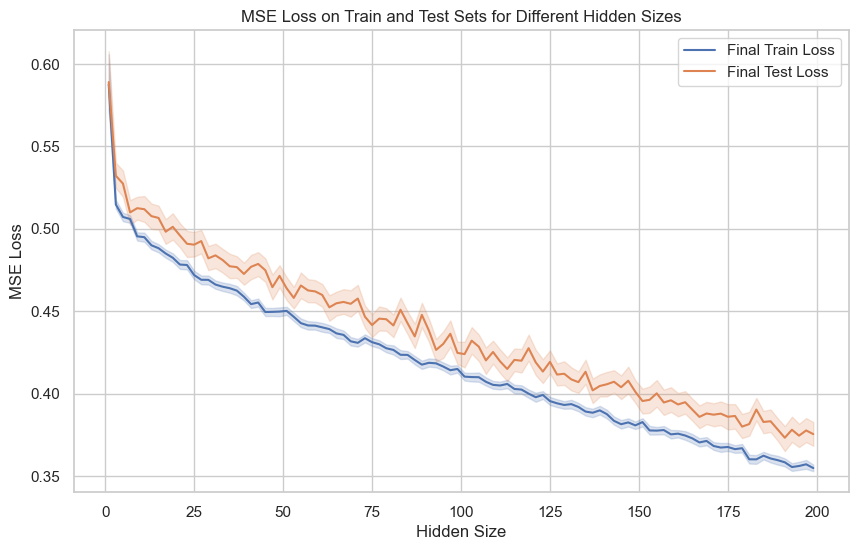

In [12]:
df = pd.DataFrame(hidden_size_losses)

# Plot the losses using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="hidden_size", y="train_losses", label="Final Train Loss")
sns.lineplot(data=df, x="hidden_size", y="test_losses", label="Final Test Loss")
plt.title("MSE Loss on Train and Test Sets for Different Hidden Sizes")
plt.xlabel("Hidden Size")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
plt.savefig("NN_trained_on_cosine.svg", format="svg")

This can also be trivially made dependent on parameter number. 
For this network, the transformation is trivial. However, the code for this is included below for completeness.

In [ ]:
df = pd.DataFrame(param_num_losses)

# Plot the losses using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="param_num", y="train_losses", label="Final Train Loss")
sns.lineplot(data=df, x="param_num", y="test_losses", label="Final Test Loss")
plt.title("MSE Loss on Train and Test Sets for Different Parameter Numbers")
plt.xlabel("Parameter Number")
plt.ylabel("MSE Loss")
plt.show()